
<center> <h1>Appendix D</h1> </center>

## Introduction

<div style="text-align: justify">
The following is a report of an experiment done on a $3\phi$, $4 − pole$ $2.2kW$ $NEMA$ $DESIGN$ $B$ induction motor in order to derive the IEEE Recommended Circuit Model by making use of: 
1. The no-load test: Provides the necessary information about the rotational loss and exciting current of the motor.
2. The locked rotor test: Provides the necessary information about the leakage impedances of the motor.
</div>

## Motor Parameters

<div style="text-align: justify">
Below are some important determinations in an attempt to characterize the motor before the $IEEE$ recommended circuit can be derived. All readings were performed by making use of a Measurement box connected in series between the supply and motor, consisting of voltage transformers with a scaling ratio of $400:1$, and current transformers with a scaling ratio of $10:1$. This allowed for readings to be taken by means of an oscilloscope, and as such the accuracy of the readings are dependent on that of the scope used.
</div>

### Motor Name-Plate Data

* $r/min$       : $1420$
* Rated Current : $4.89A$
* Rated Voltage : $400V$
* Rated Power   : $2.2kW$
* Power Factor  : $0.79$
* Connection    : $WYE (Y)$

#### No-Load Run-Time Parameters

<div style="text-align: justify">
By measuring the time difference($∆t$) between the two signals in each respective phase and assuming a grid supply frequency ($f$) of $50Hz$ (Period ($T$) = $0.02s$), the phase difference ($\theta$) between the voltage and current in each respective phase can be calculated by:

\begin{equation}
\theta=360\times \frac{\Delta t}{T}
\end{equation}

Using this Phase difference, the Real Power ($W$) is calculated by:

\begin{equation}
P_{real} = VI \cos \theta
\end{equation}

In order to determine the efficiency at which the provided electrical energy is converted to the mechanical rotation of the
rotor, a stroboscope is used to measure the rotational speed of the rotor. By attempting to match the frequency of the rotor’s
rotation with the frequency of the flashing light from the stroboscope which shines onto the rotor, an optical illusion is
created whereby the rotor seems to be in a stationary position. At this point the value is recorded and it is found that the
rotational speed of the rotor ($n$) was $1501,8rpm$. The efficiency of this electro-mechanical conversion is related to the
difference between the synchronous speed of the rotating magnetic field ($n_s$)and the speed at which the rotor shaft spins($n$). This
difference is referred to as slip, and is given by the equation:

\begin{equation}
S=\frac{n_s-n}{n_s}
\end{equation}

The synchronous speed is related to the number of poles ($p$) of the motor and its supplied frequency by:

\begin{equation}
n_s=\frac{120}{p}.f
\end{equation}

From here the Slip ($S$) is calculated as:
</div>


In [1]:
import numpy as np
import unicodedata

N_s = (120/4)*50
S = abs((N_s-1501.8)/N_s)
print ("Slip(S)=\t",S)

Slip(S)=	 0.0011999999999999698


## No-Load Test
<div style="text-align: justify">
By applying the $no-load$ test to an induction motor, the losses present are as a result of the core losses, winding losses and friction present. This test is performed by supplying the motor with its rated voltage ($400V_{line−Line}$) with the rotor uncoupled from any mechanical load. Because of this, the impedance of the magnetizing branch is large enough to prevent the flow of a large amount of current into it. By assuming the voltage drop due to the stator’s impedance is negligibly small in comparison to the applied voltage, it can be assumed that the total consumed power is converted into core losses. To perform this test, the one side of the measurement box is connected to the *Actom bench* supply while the other end is connected to the motor. By slowly increasing the voltage from $0−400V_{L−L}$ the rotor is allowed to rotate freely without an applied load. From this, and accounting for the voltage and current transformer scaling ratios, the phase stator current ($I_{p(RMS)}$) and phase voltage ($V_{p(RMS)}$) for each of the $3$ phases are measured, as well as the angle between the
voltage and current for each phase ($\theta$). The measured results are tabulated below:
</div>

| _Phase_ | Voltage( $V_{p(RMS)}$) | Stator Current ($I_{p(RMS)}$) | _Phase Shift ($\theta$)_ | _Apparent Power($W$)_ | _Real Power($VA$)_ |
|---------|-----------------------|------------------------------|--------------------------|-----------------------|--------------------|
| _$1$_   | $230.4$               | $2.43$                       | $80.64$                  | $559.87$              | $91.06$            |
| _$2$_   | $226.8$               | $2.35$                       | $87.84$                  | $532.98$              | $20.09$            |
| _$3$_   | $225.6$               | $2.18$                       | $80.64$                  | $491.81$              | $79.99$            |

<div style="text-align: justify">
Being analogous to the open circuit test in the transformer, the no load test is used to account for all losses associated with
the magnetizing core. With no power dissipation due to the load, it is assumed that all power consumed is as a result of the
core. The no load resistance ($R_{NL}$), no-load impedance ($Z_{NL}$) and the no-load reactance ($X_{NL}$) are calculated as follows:
</div>

\begin{equation}
R_{NL} = \frac{P_{NL(total)}}{3\times I_{NL(ave)}^2}
\end{equation}

\begin{equation}
|Z_{NL}| = \frac{V_{NL(ave)}}{I_{NL(ave)}}
\end{equation}

\begin{equation}
X_{NL} = \sqrt{Z_{NL}^2 -R_{NL}^2}
\end{equation}

In [2]:
P_nl = [91.06, 20.09, 79.99]
I_nl = [2.43, 2.35, 2.18]
V_nl = [230.4, 226.8, 225.6]

R_nl = np.sum(P_nl)/(3*np.square(np.average(I_nl)))
Z_nl = np.average(V_nl)/np.average(I_nl)
X_nl = np.sqrt(np.square(Z_nl)-np.square(R_nl))

print ("R_nl =\t ", R_nl.round(decimals=2), unicodedata.lookup("GREEK CAPITAL LETTER OMEGA"))
print ("Z_nl =\t ", Z_nl.round(decimals=2), unicodedata.lookup("GREEK CAPITAL LETTER OMEGA"))
print ("X_nl =\t ", X_nl.round(decimals=2), unicodedata.lookup("GREEK CAPITAL LETTER OMEGA"))

R_nl =	  11.84 Ω
Z_nl =	  98.1 Ω
X_nl =	  97.39 Ω


## Locked / Blocked Rotor test

<div style="text-align: justify">
The $locked-rotor$ test of an induction motor is analogous to the short circuit test in a transformer. The locked rotor test allows
for the calculation of the leakage impedance and provides the final parameters necessary for the equivalent circuit of the
induction motor. To perform this test, the setup is the same as the no-load test, however, as the name suggests, the locked
rotor test involves the attaching of a torque clamp arm ($52cm$ long) to the rotor and resting it on the bench such that the
rotor is prevented from moving. By inserting a scale between the bench and the end of the arm, the total torque ($\tau$) provided
by the machine under load can be calculated. By slowly increasing the voltage supplied to the machine, the stator current is
set to $150\%$ of its rated value. The voltage supplied is much lower than that of the no-load test. According to the name
plate, the rated current is stated as $4.89A$. Using this, and the recorded measurements, the following table can be drawn up:
</div>

| Phase | Voltage( $V_{RMS}$) | Stator Current ($I_{RMS}$) | Phase Shift ($\theta$) | Apparent Power($W$) |Real Power($VA$) 
|---------|-----------------------|------------------------------|--------------------------|-----------------------|--------------------|
| _$1$_   | $72$                  | $7.2$                        | $51.12$                  | $325.40$              | $518.4$            |
| _$2$_   | $69.6$                | $4.47$                       | $60.48$                  | $153.29$              | $311.11$           |
| _$3$_   | $68.4$                | $6.88$                       | $5034$                   | $299.97$              | $470.59$           |

<div style="text-align: justify">
Being analogous to the short circuit test of a transformer, the locked rotor test supplies useful information about the losses
present in the induction motor due to the stator and rotor copper losses. The locked rotor resistance ($R_{LR}$), locked rotor
impedance ($Z_{LR}$) and locked rotor reactance ($X_{LR}$) can be calculated as follows:
</div>

\begin{equation}
R_{LR} = \frac{P_{LR(total)}}{3\times I_{LR(ave)}^2}
\end{equation}

\begin{equation}
|Z_{LR}| = \frac{V_{LR(ave)}}{I_{LR(ave)}}
\end{equation}

\begin{equation}
X_{LR} = \sqrt{Z_{LR}^2 -R_{LR}^2}
\end{equation}

In [3]:
P_lr = [325.40, 153.29, 299.97]
I_lr = [7.2, 4.47, 6.88]
V_lr = [72, 69.6, 68.4]

R_lr = np.sum(P_lr)/(3*np.square(np.average(I_lr)))
Z_lr = np.average(V_lr)/np.average(I_lr)
X_lr = np.sqrt(np.square(Z_lr)-np.square(R_lr))

print ("R_lr =\t ", R_lr.round(decimals=2), unicodedata.lookup("GREEK CAPITAL LETTER OMEGA"))
print ("Z_lr =\t ", Z_lr.round(decimals=2), unicodedata.lookup("GREEK CAPITAL LETTER OMEGA"))
print ("X_lr =\t ", X_lr.round(decimals=2), unicodedata.lookup("GREEK CAPITAL LETTER OMEGA"))

R_lr =	  6.79 Ω
Z_lr =	  11.32 Ω
X_lr =	  9.06 Ω


## IEEE Recommended Equivalent Circuit
<div style="text-align: justify">
By combining the no-load and locked rotor equivalent circuit models, the final $IEEE$ recommended circuit can be
constructed. This requires the determination of the Magnetizing reactance ($X_m$), as well as the rotor's equivalent resistance ($R_{EQ(rotor)}$). These are then calculated as follows:
</div>

\begin{equation}
X_{LR} = X_1 + X_2
\end{equation}

<div style="text-align: justify">
According to ref [2], determination of $X_1$ and $X_2$ depends on the *NEMA Design* of the motor. The conversion thereof is summerised by the following table:
</div>

| Rotor Design  | $X_1$       | $X_2$          |
|---------------|-------------|--------------|
| NEMA Design A | $0.5X_{LR}$ | $0.5X_{LR}$  |
| NEMA Design B | $0.4X_{LR}$ | $0.6X_{LR}$  |
| NEMA Design C | $0.3X_{LR}$ | $0.7X_{LR}$  |
| NEMA Design D | $0.5X_{LR}$ | $0.45X_{LR}$ |

The motor used during testing was a *NEMA Design B* motor and as such:

\begin{equation}
X_1=0.4X_{LR}
\end{equation}

and, 

\begin{equation}
X_2=0.6X_{LR}
\end{equation}

Thus the Magnetizing reactance ($X_m$):

\begin{equation}
X_m = X_{NL} - X_1
\end{equation}


In [4]:
X_1 = X_lr*0.4
X_2 = X_lr*0.6
X_m = X_nl-X_1

print("X_1 =\t ", X_1.round(decimals=2), unicodedata.lookup("GREEK CAPITAL LETTER OMEGA"))
print("X_2 =\t ", X_2.round(decimals=2), unicodedata.lookup("GREEK CAPITAL LETTER OMEGA"))
print("X_m =\t ", X_m.round(decimals=2), unicodedata.lookup("GREEK CAPITAL LETTER OMEGA"))

X_1 =	  3.62 Ω
X_2 =	  5.44 Ω
X_m =	  93.76 Ω


<div style="text-align: justify">
The equivalent resistance ($R_{EQ}$) is dependent on the Stator Winding resistance ($R_{SW}$). $R_{SW}$ was measured by across 2 phases by means of a BM235 multimeter, and was found to be an average of $5.2\Omega$. This value was divided in half to determine the resistance of just 1 phase ($2.6\Omega$). This value is slightly inaccurate as the rated stator winding resistance is $2.7\Omega$ at $24^\circ C$. However, we note that the Resistance of the material ($R$) is directly related to the Resistivity ($ρ$) of that material, and inversely proportional to its cross-sectional area. By considering the atomic structure of conductors, we find that conductors have a positive temperature coefficient relating to an increase in ($\rho$). This is proven when looking at the equation for Resistance:

\begin{equation}
R=\frac{\rho L}{A}
\end{equation}

This reading was taken before running the motor, and as such the windings will have been at room temperature at the time of measurement. It is possible that the temperature in the lab during measurement was below $24^\circ C$ and as such, the resistance would be slightly lower than the rated resistance. A more accurate measurement would have been to introduce a known small DC current between 2 phases and then measure the voltage drop across the phases. This can be used as a future consideration should this lab undergo iteration. Assuming the $R_{SW}$ was in-fact measured correctly, this value ($R_{SW}=2.6\Omega$) will be used for the following calculations.
</div>

As such, the rotor’s equivalent resistance ($R_{EQ}$) can be calculated as:

\begin{align}
R_{EQ} = R_{LR} - R_{SW}
\end{align}




In [5]:
R_sw = 2.6
R_eq = R_lr - R_sw
print("R_eq =\t ", R_eq.round(decimals=2), unicodedata.lookup("GREEK CAPITAL LETTER OMEGA"))

R_eq =	  4.19 Ω


The table below summerises the results output by the above calculations to be used in contextualizing the $IEEE$ recommended Circuit.

| $R_1$($\Omega$) | $X_1$($\Omega$) | $X_m$($\Omega$) | $X_2$($\Omega$) | $R_{EQ}$($\Omega$) |
|--------------:|---------------|---------------|---------------------|------------------|
| $2.6$         | $j3.86$       | $j93.52$      | $j3.86$             | $6.15$           |

The following figure provides the visual representation of the $IEEE$ recommended circuit used in charaterizing the tested motor:

<img src="https://i.imgur.com/hLl1sLM.png" width="500" align="center"/>

### Torque - Speed Curve
<div style="text-align: justify">
Using these parameters, the Torque-Speed curve used in defining the performance characteristics of the motor can be plotted. To do this, the Thevin equivilent voltage ($V_{th}$), resistance ($R_{th}$) and reactance ($X_{th}$) are determined to generate and equation that relates the mechanical torque of the motor to the motor's slip. The Thevinin parameters are determined by:
</div>

\begin{equation}
V_{th}=\frac{X_m}{\sqrt{1^2+(X_1+X_m)^2}}\times V_{phase}
\end{equation}

\begin{equation}
R_{th}=(\frac{X_m}{X_1+X_m})
\end{equation}

\begin{equation}
X_{th}\approx X_1
\end{equation}

In [6]:
v_phase = 400/np.sqrt(3)

v_th = (X_m/np.sqrt(np.square(R_sw)+np.square(X_1+X_m)))*v_phase

R_th = np.square(X_m/(X_1+X_m))*R_sw

X_th = X_1

print("V_th =\t", v_th.round(decimals=2), unicodedata.lookup("GREEK CAPITAL LETTER OMEGA"))
print("R_th =\t", R_th.round(decimals=2), unicodedata.lookup("GREEK CAPITAL LETTER OMEGA"))
print("X_th =\t", X_th.round(decimals=2), unicodedata.lookup("GREEK CAPITAL LETTER OMEGA"))


V_th =	 222.27 Ω
R_th =	 2.41 Ω
X_th =	 3.62 Ω


The following figure provides the visual representation of the Thevenin Equivalent circuit of the above $IEEE$ recommended one:

<img src="https://i.imgur.com/mG6nRCW.png" width="500" align="center"/>

<div style="text-align: justify">
These values are then used to determine the torque ($T_{mech}$) developed by the motor as slip varies from $1$: When the rotor is locked and as such the mechanical speed is $S=0$, to $S=-1$: When the rotor is rotating at twice the rated synchronous speed ($2N_s$). This relationship is given as:
</div>

\begin{equation}
T_{mech} =\frac{1}{\omega_{syn}} \frac{3\times V_{th}^2}{(R_{th}+\frac{R_{EQ}}{S})+(X_{th}+X_2)^2} \frac{R_{EQ}}{S}
\end{equation}

Where the synchronous angular frequincy ($\omega_{syn}$) is given by:

\begin{equation}
\omega_{syn} = \frac{2\pi n}{60}
\end{equation}

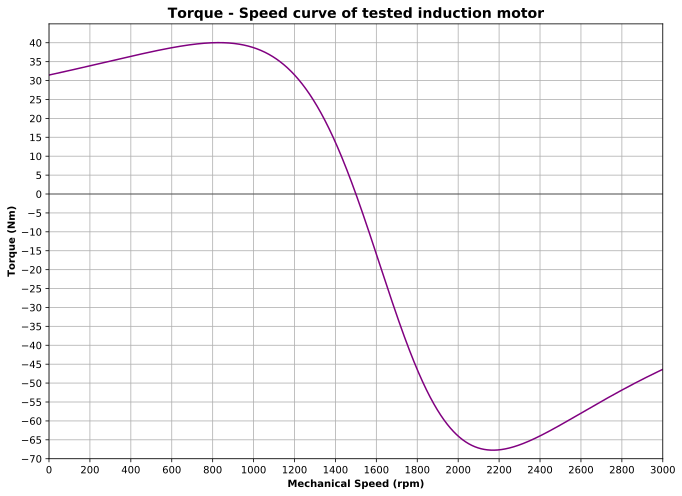

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

p=4
f=50
w_syn = N_s*2*np.pi/60
slip = np.linspace(1, -1, 3000)
speed  = np.linspace(0, 3000, 3000)

NUM = 3*np.square(v_th)*R_eq
DENUM = w_syn*slip*(np.square(R_th + R_eq/slip)+np.square(X_th+X_2))
T_mech = NUM/DENUM

plt.rcParams['figure.figsize'] = (11,8)
plt.title("Torque - Speed curve of tested induction motor", fontweight="bold", fontsize=14)
plt.axhline(0, color='black', lw=0.5)
plt.yticks(np.arange(-70, 45, 5.0))
plt.xticks(np.arange(0, 3200, 200))

plt.xlabel('Mechanical Speed (rpm)', fontweight="bold")
plt.ylabel('Torque (Nm)', fontweight="bold")
plt.axis([0,3000, -70, 45])
plt.plot(speed, T_mech, 'purple')

plt.grid()
plt.show()


From this graph, $2$ distinct operation regions are visible:

1. Motoring: <div style="text-align: justify"> When the rotor is locked, the slip is at a value of $1$ and the rotational speed of the shaft is $0rpm$. Between this region and when the motor reaches synchronous speed ($N_s=1500rpm$ and $s=0$), the motor is operating in the motoring region. </div>

2. Generating: <div style="text-align: justify"> Once the speed of the rotor increases past its rated synchronous speed ($N>N_s>1500rpm$), the motor is not operating as a generator. It continues to operate as such until the speed of the rotor equals 2 times its synchronous speed ($N=2N_s=3000rpm$), and its slip is equal to $-1$. </div>

3. Braking / Pluggin: <div style="text-align: justify"> Although not plotted on this graph, when the slip approaches $2$, the motor is operating in  the braking or plugging region of the curve where the rotor is being forced to rotate opposite to its current angle or rotation by reversing the supply voltage (swapping around two of the phases with each other). </div>

<div style="text-align: justify">
Additional information that can be determined from the above graph include the maximum torque ($T_{max}$), and the value of the slip at which the motor delivers its maximum torque ($S_{max}$). Another way to determine these parameters are through use of the following equations:
</div>

\begin{equation}
T_{max} = \frac{1}{2\omega_{syn}} \frac{3\times V_{th}^2}{R_{th}+\sqrt{R_{th}^2+(X_{th}+X_2)^2}}
\end{equation}

\begin{equation}
S_{max} = \frac{R_{EQ}}{\sqrt{R_{th}^2+(X_th + X_2)^2}}
\end{equation}

In [8]:
NUM1 = 3*np.square(v_th)
DENUM2 = 2*w_syn*(R_th+np.sqrt(np.square(R_th)+np.square(X_th+X_2)))
T_max = NUM1/DENUM2

NUM2  = R_eq
DENUM2 = np.sqrt(np.square(R_th)+np.square(X_th+X_2))
S_max = NUM2/DENUM2

print("T_max =\t ", T_max.round(decimals=2), "Nm" )
print("S_max =\t ", S_max.round(decimals=2))

T_max =	  40.03 Nm
S_max =	  0.45



## Conclusion
<div style="text-align: justify">
From the above experiment, it is noted that by making use of the no-load and locked rotor test, an equivalent IEEE recommended circuit model can be constructed. This model provides useful information about the losses associated with an induction machine. In this experiment the tests were performed on a $2.2𝑘𝑊$, $3−𝑃ℎ𝑎𝑠𝑒$, $400𝑉$, $4.89𝐴$ ,$50Hz$, $Y-Connected$, $4−pole$ $NEMA$ $design$ $B$ induction motor. The equivalent circuit derived for this machine provided the operating parameters that must be taken into account when making use of the machine during general operation or experimentation. From these parameters, the motor performance was characterized by means of the generation of a torque-speed curve, and the maximum torque as well as the value of the slip at this torque was identified. This laboratory provides a firm bases upon which the main report body can rely.
</div>

## References

1. Sen, P. (1987). Principles of Electric Machines and Power Electronics. 3rd ed. Tata McGraw-Hill.
2. 2012 North American Power Symposium (NAPS), K. Lee and S. Frank and P. K. Sen and L. G. Polese and M. Alahmad and C. Waters.(2012), Estimation of induction motor equivalent circuit parameters from nameplate data, pp1-6